<a href="https://colab.research.google.com/github/jdasam/mas1004-2023/blob/main/live_coding/2_binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from math import pi
import matplotlib.pyplot as plt
import torch

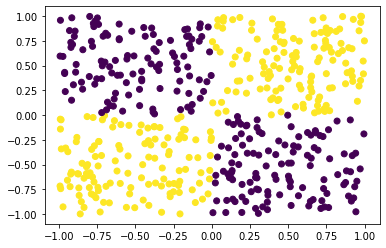

In [ ]:
# make XOR gate dataset
N = 500
data = np.random.uniform(-1, 1, (N, 2))
label = np.zeros(N)
label[np.logical_and(data[:, 0] > 0, data[:, 1] > 0)] = 1
label[np.logical_and(data[:, 0] < 0, data[:, 1] < 0)] = 1
label[np.logical_and(data[:, 0] > 0, data[:, 1] < 0)] = 0
label[np.logical_and(data[:, 0] < 0, data[:, 1] > 0)] = 0

# plot the dataset

plt.scatter(data[:, 0], data[:, 1], c=label)


In [ ]:

# make spiral data
# https://gist.github.com/45deg/e731d9e7f478de134def5668324c44c5
N = 500
theta = np.sqrt(np.random.rand(N))*2*pi # np.linspace(0,2*pi,100)

r_a = 2*theta + pi
data_a = np.array([np.cos(theta)*r_a, np.sin(theta)*r_a]).T
data_a = data_a + np.random.randn(N,2)

r_b = -2*theta - pi
data_b = np.array([np.cos(theta)*r_b, np.sin(theta)*r_b]).T
data_b = data_b + np.random.randn(N,2)

data = np.append(data_a, data_b, axis=0)
label = np.append(np.zeros(N), np.ones(N))

data = torch.from_numpy(data).float()
label = torch.from_numpy(label).float()

data.shape, label.shape

(torch.Size([1000, 2]), torch.Size([1000]))

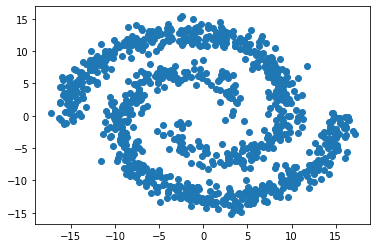

In [ ]:
plt.scatter(data[:,0], data[:,1])

In [ ]:
def visualize_decision_boundary(model, data, label):
  x_linspace = torch.linspace(min(data[:,0]), max(data[:,0]), steps=200)
  y_linspace = torch.linspace(min(data[:,1]), max(data[:,1]), steps=200)
  grid_x, grid_y = torch.meshgrid(x_linspace, y_linspace)
  grid_xy = torch.stack([grid_x, grid_y]).permute(1,2,0)
  grid_xy = grid_xy.view(-1, 2)
  value_by_grid = model(grid_xy)
  value_by_grid = value_by_grid.view(200, 200, 1)
  value_by_grid[value_by_grid<=0.5] = 0
  value_by_grid[value_by_grid>0.5] = 1

  plt.scatter(x=data[label[0]==0,0], y=data[label[0]==0,1])
  plt.scatter(x=data[label[0]==1,0], y=data[label[0]==1,1])

  plt.contourf(grid_x.detach().numpy(), grid_y.detach().numpy(), value_by_grid.detach().numpy().squeeze(), alpha=0.3)